In [17]:
a = np.zeros((1,3))
a

array([[0., 0., 0.]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def rastrigin(x):
    A = 3
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# 示例用法
x = np.array([1, 2, 3])
result = rastrigin(x)
print(result)


14.0


############ Generation 1 ############
[-3.41523654 -4.9957571 ]
226.17191811619386
最好的位置：[-3.41523654 -4.9957571 ]
最大的函数值：226.17191811619386
############ Generation 2 ############
[-3.72382451 -5.        ]
226.74908004255593
最好的位置：[-3.72382451 -5.        ]
最大的函数值：226.74908004255593
############ Generation 3 ############
[ 4.2593258 -5.       ]
227.76988869414518
最好的位置：[ 4.2593258 -5.       ]
最大的函数值：227.76988869414518
############ Generation 4 ############
[ 4.09109598 -4.99949967]
227.44841935802012
最好的位置：[ 4.2593258 -5.       ]
最大的函数值：227.76988869414518
############ Generation 5 ############
[ 4.25555664 -5.        ]
227.76280121723428
最好的位置：[ 4.2593258 -5.       ]
最大的函数值：227.76988869414518
############ Generation 6 ############
[ 4.40743068 -5.        ]
228.05314503332673
最好的位置：[ 4.40743068 -5.        ]
最大的函数值：228.05314503332673
############ Generation 7 ############
[ 4.44874154 -4.9387514 ]
226.78659317028988
最好的位置：[ 4.40743068 -5.        ]
最大的函数值：228.05314503332673
############ G

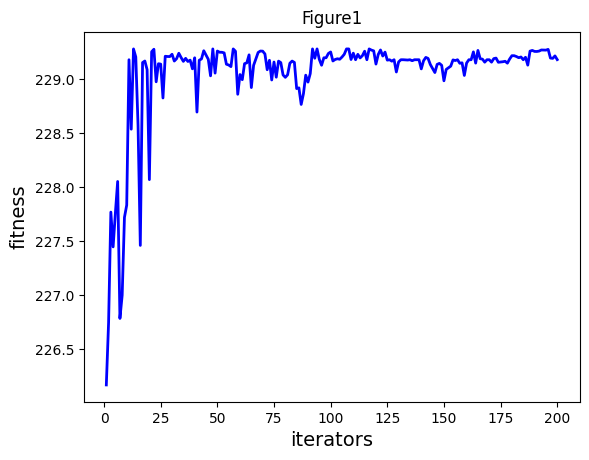

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
#每一个个体就是一个蚂蚁
#一个种群就是一个蚁群
 
class ACO:
    def __init__(self, parameters):
        """
        Ant Colony Optimization
        parameter: a list type, like [NGEN, pop_size, var_num_min, var_num_max]
        """
        # 初始化
        self.NGEN = parameters[0]  #迭代的代数
        self.pop_size = parameters[1]  #种群大小


        self.var_num = len(parameters[2])  #变量个数


        self.bound = []  #变量的约束范围
        self.bound.append(parameters[2]) #加入变量约束范围
        self.bound.append(parameters[3]) #加入变量约束范围，加入两个列表，bound成为2维的
        self.pop_x = np.zeros((self.pop_size, self.var_num))  # 所有蚂蚁的位置，pop_x是2维的
        self.g_best = np.zeros((1, self.var_num))  # 全局蚂蚁最优的位置，大小等于一个个体
 
        # 初始化第0代初始全局最优解
        temp = -1
        for i in range(self.pop_size):
            for j in range(self.var_num):#对2维列表pop_x做遍历，每一行可以视作一个个体，每个个体里面含一组完整的解
                self.pop_x[i][j] = np.random.uniform(self.bound[0][j], self.bound[1][j])#为每一个个体的每一个解随机生成一个答案
            
            fit = self.fitness(self.pop_x[i])#为每个个体计算适应度
            if fit > temp:#寻找当前种群的最优个体
                self.g_best = self.pop_x[i]#gbest为最优位置列表更新最大值，即最优个体
                temp = fit#同时刷新最大值的比较标准
 
    def fitness(self, x):
        """
        个体适应值计算，计算每个蚂蚁的适应度，并进一步用来计算蚂蚁个体的信息素 
        """
        # x_group = ind_var[0]
        # y_group = ind_var[1]
        # for i in range(1,6):
        #     x_group += i*np.cos((i+1)*ind_var[0]+i)
        # for i in range(1,6):
        #     y_group += i*np.cos((i+1)*ind_var[1]+i)
        # return x_group*y_group

        
        result = 100 * math.sqrt(abs(x[1] - 0.01 * x[0]**2)) + 0.01 * abs(x[0] + 10)
        
        return result
            # x1 = ind_var[0]
            # x2 = ind_var[1]
            # y = x1 ** 2 + x2 ** 2
            # return y
 
    def update_operator(self, gen, t, t_max):
        """
        更新算子：根据概率更新下一时刻的位置和信息素，挑选最好的位置保存
        gen是当前的代数，t是信息素列表，t_max是当前信息素列表中信息素最大的值
        每个个体都对应一个信息素量，当信息素相对少时该个体便大概率进行行动，迭代次数多了之后个体的优度整体提升
        """
        rou = 0.8   # 信息素挥发系数
        Q = 1       # 信息释放总量，蚂蚁们工作循环一次释放的信息总量
        lamda = 1 / gen #lamda随着代数增加而减小，用于局部搜索
        pi = np.zeros(self.pop_size)#概率表，存储每个个体的转移概率
        for i in range(self.pop_size):#对每一个变量做遍历
            for j in range(self.var_num):
                pi[i] = (t_max - t[i]) / t_max #计算行动概率，信息素越少行动概率越大
                # 更新蚂蚁们位置
                if pi[i] < np.random.uniform(0, 1):#进行局部搜索
                    self.pop_x[i][j] = self.pop_x[i][j] + np.random.uniform(-1, 1) * lamda
                else:#进行全局搜索
                    self.pop_x[i][j] = self.pop_x[i][j] + np.random.uniform(-1, 1) * (
                                self.bound[1][j] - self.bound[0][j]) / 2
                # 越界保护，令每个解的值不会超过边界
                if self.pop_x[i][j] < self.bound[0][j]:
                    self.pop_x[i][j] = self.bound[0][j]
                if self.pop_x[i][j] > self.bound[1][j]:
                    self.pop_x[i][j] = self.bound[1][j]
            # 更新t值，根据当前的信息素更新下一时刻的信息素
            t[i] = (1 - rou) * t[i] + Q * self.fitness(self.pop_x[i])
            # 更新全局最优值
            if self.fitness(self.pop_x[i]) > self.fitness(self.g_best):
                self.g_best = self.pop_x[i]
        t_max = np.max(t)#对信息素序列进行检索得到最大值
        return t_max, t
 
    def main(self):#运行的主程序
        popobj = []#记录最大值
        best = np.zeros((1, self.var_num))[0]#记录最大值的位置
        for gen in range(1, self.NGEN + 1):#迭代循环
            if gen == 1:#第一代首先初始化信息素列表与信息素最大值，直接使用最初的适应度带入计算
                tmax, t = self.update_operator(gen, np.array(list(map(self.fitness, self.pop_x))),
                                     np.max(np.array(list(map(self.fitness, self.pop_x)))))
            else:#第二代之后循环
               tmax, t = self.update_operator(gen, t, tmax)
            popobj.append(self.fitness(self.g_best))#每一代的最大值都记录下
            print('############ Generation {} ############'.format(str(gen)))#打印每代信息
            print(self.g_best)
            print(self.fitness(self.g_best))
            if self.fitness(self.g_best) > self.fitness(best):
                best = self.g_best.copy()
            print('最好的位置：{}'.format(best))
            print('最大的函数值：{}'.format(self.fitness(best)))
        print("---- End of (successful) Searching ----")
 
        plt.figure()
        plt.title("Figure1")
        plt.xlabel("iterators", size=14)
        plt.ylabel("fitness", size=14)
        t = [t for t in range(1, self.NGEN + 1)]
        plt.plot(t, popobj, color='b', linewidth=2)
        plt.show()
 
 
if __name__ == '__main__':
    NGEN = 200#迭代代数
    popsize = 100#蚁群的个体数量
    low = [-5, -5]#四个变量的下界
    up = [5,5]#四个变量的上界
    parameters = [NGEN, popsize, low, up]#做成参数列表
    aco = ACO(parameters)#参数代入
    aco.main()#运行



In [25]:
import numpy as np
import matplotlib.pyplot as plt

def ackley_function(x):
    n = len(x)
    m = 10
    result = 0
    
    for i in range(n):
        xi = x[i]
        temp = math.sin(xi) * (math.sin(((i+1)*xi**2)/math.pi))**(2*m)
        result += temp
    
    return -result

# 创建网格点
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 计算对应的函数值
Z = ackley_function([X, Y])

# 绘制图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Ackley Function')
ax.set_title('Ackley Function Surface')
x_point = -4.60001902  
y_point = 4.59910193
z_point =ackley_function(x_point,y_point)
ax.scatter(x_point, y_point, z_point, s=50, color='red', marker='o')

# 显示图像
plt.show()


TypeError: only length-1 arrays can be converted to Python scalars